In [11]:
from scipy.linalg import *
import numpy as np


In [12]:
# 1a,b,c

#A = np.arange(1,10).reshape(3,3)
#b = np.arange(1,4)
#print(A)
#print(b)

A = np.array([[1,2,3], [4,5,6], [7,8,9]])
b = np.array([1,2,3])

x = solve(A,b)
x

/var/folders/wc/k3kd57cs68x_f3_7t6nvncmc0000gn/T/ipykernel_20743/527896159.py:11: LinAlgWarning: Ill-conditioned matrix (rcond=2.20282e-18): result may not be accurate.
  x = solve(A,b)


array([-0.23333333,  0.46666667,  0.1       ])

In [15]:
# 1d, solution is correct
np.dot(A, x) - b

array([0., 0., 0.])

In [29]:
# 1e
B = np.random.rand(3,3)
# Answer will now be a matrix, X.
X = solve(A,B)
# Check solution
sol = np.dot(A, X) - B
norm(sol)

# Wrong, should be 0? 

/var/folders/wc/k3kd57cs68x_f3_7t6nvncmc0000gn/T/ipykernel_20743/1949490327.py:4: LinAlgWarning: Ill-conditioned matrix (rcond=2.20282e-18): result may not be accurate.
  X = solve(A,B)


3.934781444641575

In [36]:
# 1f, Eigenvalue problem for A

evals, evecs = eig(A)

print(evals)
print(evecs)

[ 1.61168440e+01+0.j -1.11684397e+00+0.j -8.58274334e-16+0.j]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


In [38]:
# Check solution
n = 1

norm(np.dot(A, evecs[:,n]) - evals[n] * evecs[:,n])

2.3314683517128287e-15

In [42]:
# 1g, inverse and determinant of A

I = inv(A)
print(I)
detA = det(A) 
print(detA) 

[[ 3.15251974e+15 -6.30503948e+15  3.15251974e+15]
 [-6.30503948e+15  1.26100790e+16 -6.30503948e+15]
 [ 3.15251974e+15 -6.30503948e+15  3.15251974e+15]]
0.0


In [47]:
# 1h 
norm(A, ord=2)

16.84810335261421

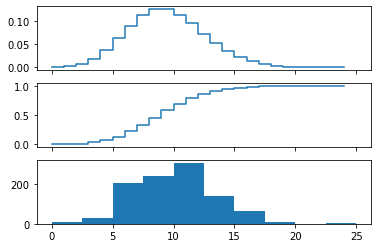

In [51]:
# Part 2 - statistics
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

# 1a discrete random variable X ~ Po
X = stats.poisson(10)

n = np.arange(0,25)

fig, axes = plt.subplots(3,1, sharex=True)

# plot PMF
axes[0].step(n, X.pmf(n))

# plot CDF
axes[1].step(n, X.cdf(n))

# plot histogram of 1000 random realizations of the stochastic variable X
axes[2].hist(X.rvs(size=1000));

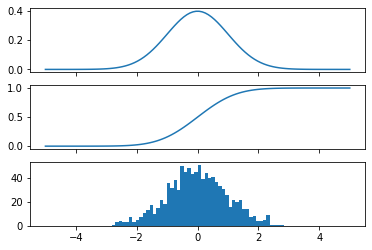

In [53]:
# 1b Y ~ N
Y = stats.norm()

x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# plot PDF
axes[0].plot(x, Y.pdf(x))

# plot CDF
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

In [64]:
#1c random data from X and Y come from different distriubtions
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), Y.rvs(size=1000))

print("t-statistic =", t_statistic)
print("p-value =", p_value)

# random data from X and X come from the same distribution
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print("t-statistic =", t_statistic)
print("p-value =", p_value)

t-statistic = 92.69637393860218
p-value = 0.0
t-statistic = -0.5775357306548302
p-value = 0.5636426825568158
